In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Load datasets
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

# Display basic information about the datasets
print("Customers Dataset Info:")
print(customers.info(), "\n")

print("Products Dataset Info:")
print(products.info(), "\n")

print("Transactions Dataset Info:")
print(transactions.info(), "\n")


Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #  

In [11]:
# Check for missing values
print("Missing Values:\n")
print("Customers:\n", customers.isnull().sum())
print("\nProducts:\n", products.isnull().sum())
print("\nTransactions:\n", transactions.isnull().sum())

# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Basic statistics for numeric columns
print("\nSummary Statistics:")
print(transactions.describe())

# Merge datasets for comprehensive analysis
merged = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Preview merged data
print("\nMerged Dataset:")
print(merged.head())


Missing Values:

Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Summary Statistics:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76

**EDA and Visualization**

<ipython-input-12-ff467b41b5f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Region', data=customers, order=customers['Region'].value_counts().index, palette='viridis')


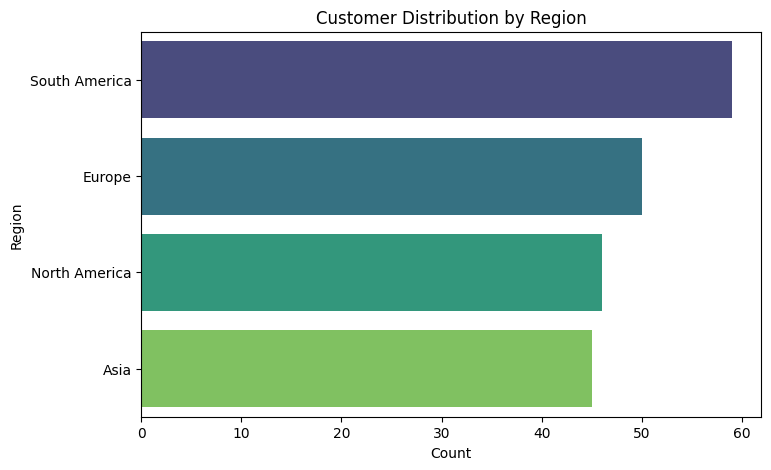

In [12]:

# 1. Region-wise customer distribution
plt.figure(figsize=(8, 5))
sns.countplot(y='Region', data=customers, order=customers['Region'].value_counts().index, palette='viridis')
plt.title("Customer Distribution by Region")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()


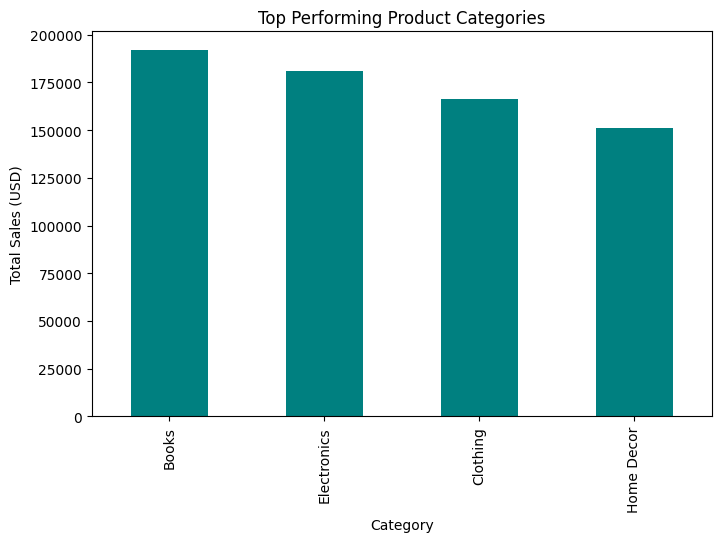

In [13]:
# 2. Top-performing product categories
top_categories = merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
top_categories.plot(kind='bar', color='teal')
plt.title("Top Performing Product Categories")
plt.xlabel("Category")
plt.ylabel("Total Sales (USD)")
plt.show()


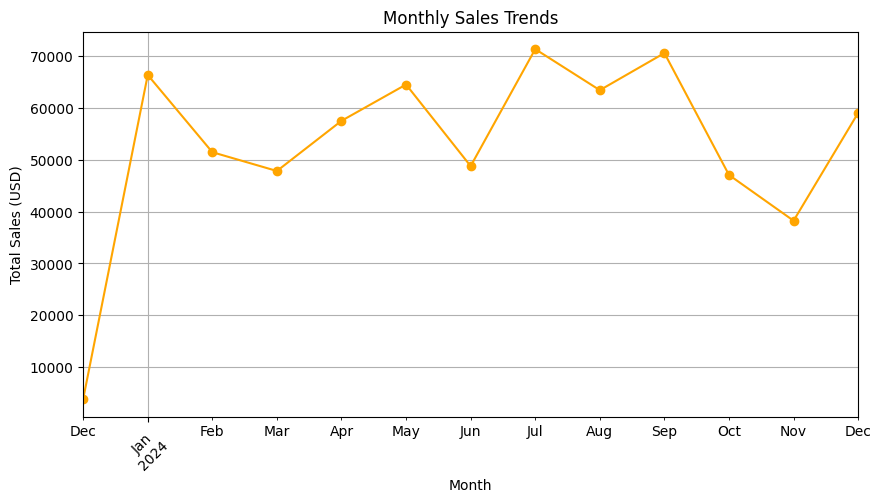

In [14]:
# 3. Monthly transaction trends
merged['Month'] = merged['TransactionDate'].dt.to_period('M')
monthly_sales = merged.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(10, 5))
monthly_sales.plot(color='orange', marker='o')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.grid()
plt.show()


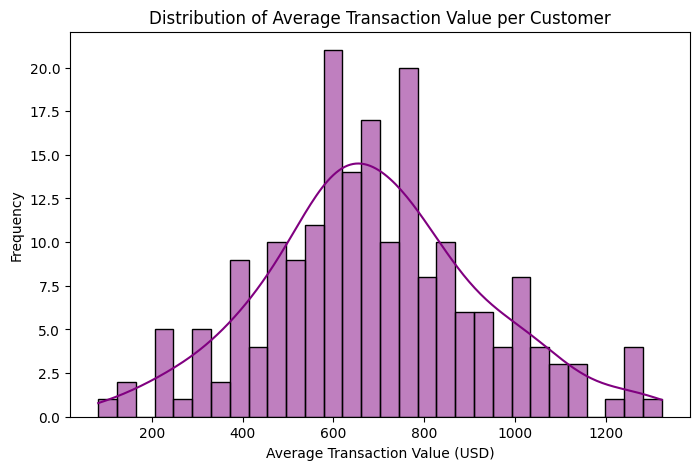

In [15]:
# 4. Average transaction value per customer
avg_transaction_value = merged.groupby('CustomerID')['TotalValue'].mean()
plt.figure(figsize=(8, 5))
sns.histplot(avg_transaction_value, kde=True, color='purple', bins=30)
plt.title("Distribution of Average Transaction Value per Customer")
plt.xlabel("Average Transaction Value (USD)")
plt.ylabel("Frequency")
plt.show()


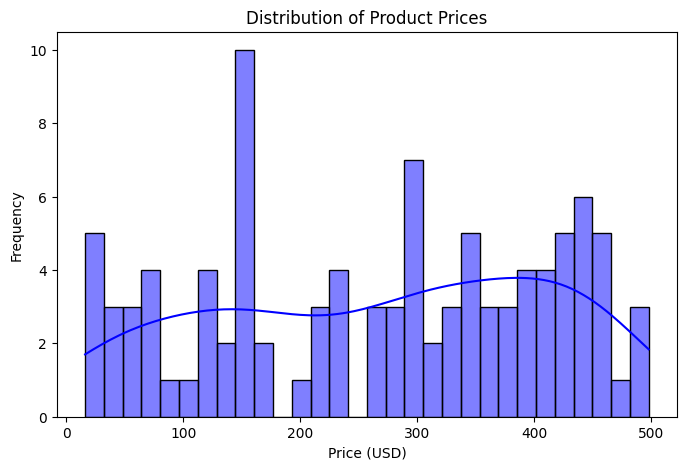

In [16]:
# 5. Product pricing analysis
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], kde=True, color='blue', bins=30)
plt.title("Distribution of Product Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()
